In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import imshow,gray,show, title
from math import *

In [15]:
#Parameters are taken from: Shelley, Christopher, and Karl L. Magleby. “Linking Exponential Components to Kinetic States in Markov Models for Single-Channel Gating.” The Journal of General Physiology, vol. 132, no. 2, Aug. 2008, pp. 295–312, doi:10.1085/jgp.200810008.

#Part 1: Two-state model of single-channel kinetic
#Simulation data and a fit according to discrete state Markov model is generated
#Simulation is obtained by generating a wide range of close dwell time interval. In addition, the probability of leaving one state is exp(-t*k)
#Fit is based on PDF of two_state model which is given by a simple exponential fu

#Initial values
N = 1000               #For two-state modelsimulation. The number of close state initially
k = 1000               #Transition rate, in 1/s
points = int(1e+5)     #Number of iteration
length = 0.01          #Maximum length of the intervals, in second
dt = length/points     #Time steps
t = 0                  #Inital value of dwell time interval 
rate = 1/k             #Time constant, in second  
f = []                 #Create arrays for storing information
time = []
number = []

#Main loop for simulation and data fitting functions
for i in range(points):
    #PDF function according to DSM model
    f.append((1/rate)*exp(-t/rate))
    
    #Simulation data
    rarray = np.random.uniform(size = N)     #generate N random number and compare with the probability of staying in the current state
    p = 1-exp(-t*k)                          #probability of staying in current state
    p_above = [j for j in rarray if j > p]   #only if the random number larger than the probability the state is reserved
    number.append(len(p_above))              #number of close state left in interval t
    time.append(t)
    t += dt

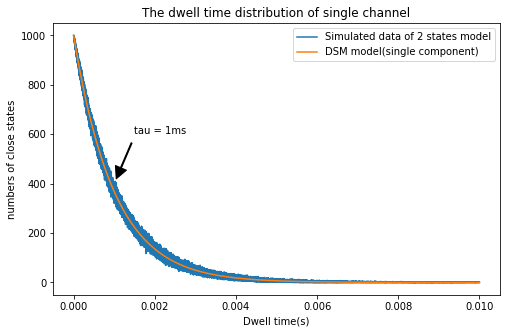

In [16]:
#Ploting the simulation data and the fit
fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(time,number, label = "Simulated data of 2 states model")
plt.plot(time,f,label="DSM model(single component)")
plt.xlabel("Dwell time(s)")
plt.ylabel("numbers of close states")
plt.title("The dwell time distribution of single channel")

ax.annotate('tau = 1ms', xy=(0.001, 400), xytext=(0.0015, 600),arrowprops=dict(width = 1,facecolor='black', shrink=0.1),  )
plt.legend()
show()

In [17]:
#This method is according to: Qin, Feng. Principles of Single-Channel Kinetic Analysis BT  - Patch-Clamp Methods and Protocols. Edited by Marzia Martina and Stefano Taverna, Springer New York, 2014, pp. 371–99, doi:10.1007/978-1-4939-1096-0_23.

#Part 2: Three-state model of single-channel kinetic
#Step one: Figuring out the parameters in each component from Q-matrix of of the system 

#Transition rates are obtained from the literature (Shelley, Christopher, and Karl L. Magleby.2008))
k21=k1o = 500
k12=ko1 = 1000

#Generate Q-matrix (transition rate matrix)
Q = [[-k21,k12,0],[k21,-k12-k1o,ko1],[0,k1o,-ko1]]

#Calculate eigenvalues and eigenvectors of the Q-matrix
w,v = np.linalg.eig(Q)

#Using the negtive eigenvalues as the time comstant for each exponential element in DSM model
tau = []
for i in range(3):
    if w[i]<0:
        tau.append(1/w[i]) 


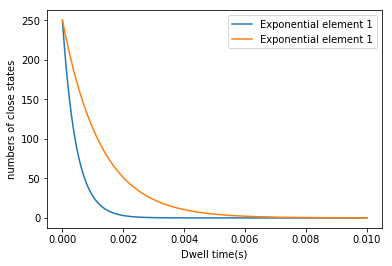

In [20]:
#Step two: finding the area/fraction of each component

tau_1 = tau[0]     #time comstant of each component 
tau_2 = tau[1]
E_1 = []           #Arrays for storing information
E_2 = []
time = []
t = 0

#Main loop to plot each exponential component
for i in range(points):
   
    E_1.append(250*exp(t/tau_1))
    E_2.append(250*exp(t/tau_2))
    time.append(t)
    t += dt
plt.plot(time,E_1,label="Exponential element 1")
plt.plot(time,E_2,label="Exponential element 1")
plt.legend()
plt.xlabel("Dwell time(s)")
plt.ylabel("numbers of close states")
show()

In [21]:
#Step 3: Calculate the area/fraction of each component use numerical integral method

#initial value of the integral
area_1 = 0
area_2 = 0
for i in range(len(E_1)):  #E_1 and E_2 are already discrete values with a step dt, hence integral value is simply the y-value at each point times interval dt
    area_1 += E_1[i]*dt
    area_2 += E_2[i]*dt

#Normalize the areas
a_1 = area_1/(area_1+area_2)
a_2 = area_2/(area_1+area_2)
print(a_1,a_2)

0.2643815428462736 0.7356184571537265


In [22]:
#Step 4: Calculate the PDF according to teh DSM model

pdf_2 = []
time = []
t= 0
number = [500]
N =int(500)
for i in range(points):
    pdf_2.append(-1*(a_1/tau_1)*exp(t/tau_1)-(a_2/tau_2)*exp(t/tau_2))
    time.append(t)
    t += dt

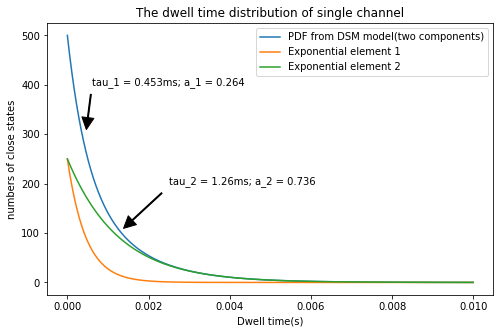

In [24]:
#Plot the PDF and the exponential components 

fig, ax = plt.subplots(figsize=(8, 5))

ax.annotate('tau_1 = 0.453ms; a_1 = 0.264', xy=(0.000453, 300), xytext=(0.0006, 400),
            arrowprops=dict(width = 1,facecolor='black', shrink=0.1),
            )
ax.annotate('tau_2 = 1.26ms; a_2 = 0.736', xy=(0.00126, 100), xytext=(0.0025, 200),
            arrowprops=dict(width = 1,facecolor='black', shrink=0.1),
            )
plt.plot(time,np.array(pdf_2)*500/pdf_2[0],label = "PDF from DSM model(two components)")
plt.plot(time,E_1, label = "Exponential element 1")
plt.plot(time,E_2, label = "Exponential element 2")
plt.legend()
plt.xlabel("Dwell time(s)")
plt.ylabel("numbers of close states")
plt.title("The dwell time distribution of single channel")
show()

In [25]:
#Step 5: generate the simulated data (similar to part one)

N = int(250)
M = int(250)

t_1 = 1/k21
t_21 = 1/k12
t_20 = 1/k1o
number = []
t = 0
time = []

for i in range(points):
    
    
    rarray_1 = np.random.uniform(size = 250)       
    p1 = 1-exp(-2.5*t/(t_1))
    p1_above = [j for j in rarray_1 if j > p1] 
    N = len(p1_above)
    
    rarray_2 = np.random.uniform(size = 250)  
    p2 = 1-exp(-2.5*t/(t_21+t_20))
    p2_above = [j for j in rarray_2 if j > p2]
    M = len(p2_above)
    #m = 250 - M
    
    """for j in range(int(m)):
        if np.random.random()< k12/(k12+k1o):
            N += 1
        else:
            N = N"""
    #M += 250 - N
    time.append(t)
    t += dt
    number.append(N+M)

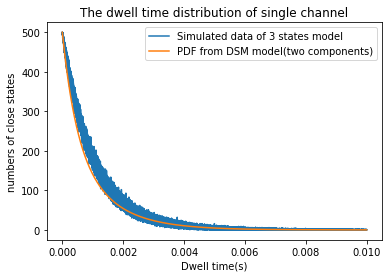

In [26]:
plt.plot(time,number, label = "Simulated data of 3 states model")
plt.plot(time,np.array(pdf)*500/pdf[0],label = "PDF from DSM model(two components)")
plt.legend()
plt.xlabel("Dwell time(s)")
plt.ylabel("numbers of close states")
plt.title("The dwell time distribution of single channel")
show()